<a href="https://colab.research.google.com/github/HajjoujiProf/Clustering-Using-K-Means/blob/main/Clustering_Using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clustering is an unsupervised problem of finding natural groups in the feature space of input data.
# There are many different clustering algorithms and no single best method for all datasets.
# we can implement, fit, and use 
# top clustering algorithms in Python with the scikit-learn machine learning library

In [ ]:
# Examples of Clustering Algorithms

   # Library Installation
   # Clustering Dataset
   # Affinity Propagation
   # Agglomerative Clustering
   # BIRCH
   # DBSCAN
   # K-Means
   # Mini-Batch K-Means
   # Mean Shift
   # OPTICS
   # Spectral Clustering
   # Gaussian Mixture Model


In [ ]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
# loading the dataset
dataset = pd.read_csv('/content/sample_data/MallCustomers.csv')

# printing first five rows of the dataset
print(dataset.head(10))


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [ ]:
# printing the shape of dataset
print(dataset.shape)

# checking for any
# null values present
print(dataset.isnull().sum())


(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# extracting values from two
# columns for clustering
new_dataset = dataset[['Annual Income (k$)',
					'Spending Score (1-100)']].values


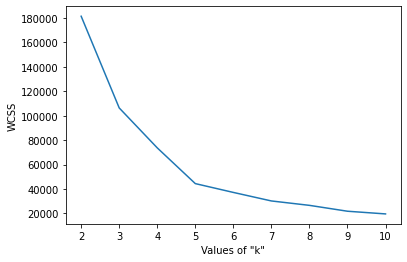

In [ ]:
# determining the maximum number of clusters
# using the simple method
limit = int((new_dataset.shape[0]//2)**0.5)

# selecting optimal value of 'k'
# using elbow method

# wcss - within cluster sum of
# squared distances
wcss = {}

for k in range(2,limit+1):
	model = KMeans(n_clusters=k)
	model.fit(new_dataset)
	wcss[k] = model.inertia_
	
# plotting the wcss values
# to find out the elbow value
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# we can observe that the turning point of this curve is at the value of k = 5. 
# Therefore, we can say that the ‘right’ number of clusters for this data is 5

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# loading the dataset
dataset = pd.read_csv('/content/sample_data/MallCustomers.csv')

# printing first five rows of the dataset
print(dataset.head(8))


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94


In [ ]:
# printing the shape of dataset
print(dataset.shape)

# checking for any
# null values present
print(dataset.isnull().sum())


(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# extracting values from two
# columns for clustering
new_dataset = dataset[['Annual Income (k$)',
					'Spending Score (1-100)']].values


In [ ]:
# determining the maximum number of clusters
# using the simple method
limit = int((new_dataset.shape[0]//2)**0.5)

# determining number of clusters
# using silhouette score method
for k in range(2, limit+1):
	model = KMeans(n_clusters=k)
	model.fit(new_dataset)
	pred = model.predict(new_dataset)
	score = silhouette_score(new_dataset, pred)
	print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))


Silhouette Score for k = 2: 0.318
Silhouette Score for k = 3: 0.468
Silhouette Score for k = 4: 0.493
Silhouette Score for k = 5: 0.554
Silhouette Score for k = 6: 0.540
Silhouette Score for k = 7: 0.529
Silhouette Score for k = 8: 0.458
Silhouette Score for k = 9: 0.457
Silhouette Score for k = 10: 0.451


In [ ]:
# Silhouette score is used to evaluate  
# the quality of clusters created using clustering algorithms such as K-Means
# Determining the number of clusters using silhouette score
# sklearn.metrics.silhouette _score() is used to find the score in Python
# As we can observe, the value of k = 5 has the highest value i.e. nearest to +1. 
# we can say that the optimal value of ‘k’ is 5.

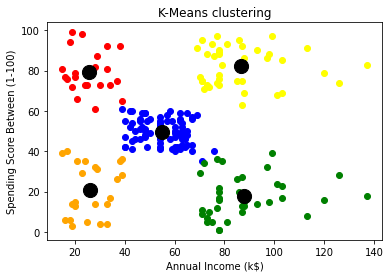

In [ ]:
# clustering the data using Kmeans
# using k = 5
model = KMeans(n_clusters=5)

# predicting the clusters
pred = model.fit_predict(new_dataset)

# plotting all the clusters
colours = ['blue', 'green', 'yellow', 'orange', 'red']

for i in np.unique(model.labels_):
	plt.scatter(new_dataset[pred==i, 0],
				new_dataset[pred==i, 1],
				c = colours[i])
	
# plotting the cluster centroids
plt.scatter(model.cluster_centers_[:, 0],
			model.cluster_centers_[:, 1],
			s = 200, # marker size
			c = 'black')

plt.title('K-Means clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score Between (1-100)')
plt.show()

In [ ]:
# we can see that five efficient clusters have been formed 
# which are clearly separable from each other